## **Notebook to make predictions with reprocessed Henson data and SPOT**

By Christina Schenk and Garrett Roell

Tested on biodesign_3.7 kernel on jprime

### SPOT predictions and evaluations
This notebook predicts fluxes for R. opacus cultures growing with phenol. The data was published in [Henson (2018)](https://www.sciencedirect.com/science/article/pii/S1096717618300910).

#### **Data Labels:**
                                                 
#### Henson:
* WT 0.5g/L Phenol 		(**WT-P**)
* PVHG6 0.5g/L  Phenol 	(**PVHG-P**)

### Method: 
<ul>
    <li>WT</li>
    <ol>    
    <li>Predict fluxes with SPOT</li>
    <li>Compare predictions with 13CMFA: Scatter plots and flux maps</li>
   </ol>
    <li>PVHG</li>
    <ol>    
    <li>Predict fluxes with SPOT</li>
    <li>Compare predictions with 13CMFA: Scatter plots and flux maps</li>
   </ol>
</ul>

3. Load file with observed growth rates (Notebook E)
    
4. Compare growth rate predictions with growth rate observations



##### **Import python packages**

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import cobra
import scipy.stats
#import cplex
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import matplotlib.image as mpimg
import matplotlib.cm as cm

from edd_utils import login, export_study, export_metadata

from sklearn.metrics import r2_score

##### **Load data**

In [2]:
# # Study to Download
# study_slug = 'biodesign_henson2018_reprocessed'
# # EDD server
# edd_server = 'public-edd.jbei.org'
# user       = 'schenkch'

In [3]:
# session = login(edd_server=edd_server, user=user)

# df = export_study(session, study_slug, edd_server=edd_server)
# #df.head()

In [4]:
# define blank dictionary and fill with transcript measurements from different conditions and carbon sources
transcript_measurements = {}
# add glucose conditions to data set object
# transcript_measurements['glucose_cpm'] = pd.read_csv('../winston_data/october_19_2021/yoneda/yoneda_reprocess_CPM_melted.csv')
# transcript_measurements['glucose_fpkm'] = pd.read_csv('../winston_data/october_19_2021/yoneda/yoneda_reprocess_FPKM_melted.csv')
# transcript_measurements['glucose_mr'] = pd.read_csv('../winston_data/october_19_2021/yoneda/yoneda_reprocess_MR_melted.csv')
# transcript_measurements['glucose_tmm'] = pd.read_csv('../winston_data/october_19_2021/yoneda/yoneda_reprocess_TMM_melted.csv')
# add phenol conditions to data set object
transcript_measurements['phenol_cpm'] = pd.read_csv('../winston_data/october_19_2021/henson/henson_reprocess_CPM_melted.csv')
transcript_measurements['phenol_fpkm'] = pd.read_csv('../winston_data/october_19_2021/henson/henson_reprocess_FPKM_melted.csv')
transcript_measurements['phenol_mr'] = pd.read_csv('../winston_data/october_19_2021/henson/henson_reprocess_MR_melted.csv')
transcript_measurements['phenol_tmm'] = pd.read_csv('../winston_data/october_19_2021/henson/henson_reprocess_TMM_melted.csv')

##### **Filter transcriptomics data from all EDD data into different dataframes**

In [5]:
# df_Trans = df[df['Protocol'].str.contains('Transcriptomics')]
# df_Trans.head()

In [6]:
df_Trans = transcript_measurements['phenol_cpm'] #fpkm

##### **Load Genome Scale Model**

In [7]:
file_name =  '../GSMs/Ropacus_annotated_curated.xml'
model = cobra.io.read_sbml_model(file_name)

##### **Import SPOT and other utility functions code**

In [8]:
SourceDir = '../src'
sys.path.append(SourceDir)
from ensemblemethods import SPOT
from utils import *

### Wild Type

#### **1. SPOT Predictions for Wild type**

In [9]:
spotsol, spotsol_std = spot_pred_for_three_reps(model, df_Trans, 'WT-P-R1', 'WT-P-R2','WT-P-R3', 'phenol')

{'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_cl_e': inf,
 'EX_pi_e': inf,
 'EX_nh4_e': inf,
 'EX_fe3_e': inf,
 'EX_k_e': inf,
 'EX_ca2_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_cobalt2_e': inf,
 'EX_zn2_e': inf,
 'EX_cu2_e': inf,
 'EX_o2_e': inf,
 'EX_fe2_e': inf,
 'EX_mobd_e': inf,
 'EX_so4_e': inf,
 'EX_phenol_e': inf}

{'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_cl_e': inf,
 'EX_pi_e': inf,
 'EX_nh4_e': inf,
 'EX_fe3_e': inf,
 'EX_k_e': inf,
 'EX_ca2_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_cobalt2_e': inf,
 'EX_zn2_e': inf,
 'EX_cu2_e': inf,
 'EX_o2_e': inf,
 'EX_fe2_e': inf,
 'EX_mobd_e': inf,
 'EX_so4_e': inf,
 'EX_phenol_e': inf}

{'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_cl_e': inf,
 'EX_pi_e': inf,
 'EX_nh4_e': inf,
 'EX_fe3_e': inf,
 'EX_k_e': inf,
 'EX_ca2_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_cobalt2_e': inf,
 'EX_zn2_e': inf,
 'EX_cu2_e': inf,
 'EX_o2_e': inf,
 'EX_fe2_e': inf,
 'EX_mobd_e': inf,
 'EX_so4_e': inf,
 'EX_phenol_e': inf}

##### **Save solution to data frame**

In [10]:
spotsoldf = pd.DataFrame(spotsol, columns=['fluxes'])
spotsolstddf = pd.DataFrame(spotsol_std, columns=['stds'])

In [11]:
spotsol.loc['Growth_Glucose']

fluxes    0.0
Name: Growth_Glucose, dtype: float64

In [12]:
spotsol.loc['Growth_Phenol']

fluxes   -1.029960e-11
Name: Growth_Phenol, dtype: float64

In [13]:
spotsol.loc['EX_tag']

fluxes    0.0
Name: EX_tag, dtype: float64

#### **2. Plot solutions: Comparison of SPOT WT predictions and 13c measurements**

##### **Load 13cdata**

#####  **Get 13C MFA measured fluxes for phenol**

In [14]:
phenol_fluxes = pd.read_csv('../13C_flux_data/13C_phenol_flux_data.csv')

# Remove rows that do not have a mapping to the GSM
phenol_fluxes.dropna(subset = ["Forward Reactions"], inplace=True)
print(f'There are {len(phenol_fluxes)} fluxes that can be compared between the MFA and FBA')

There are 43 fluxes that can be compared between the MFA and FBA


In [15]:
obspred_fluxes = add_pred_fluxes_to_13c_df(phenol_fluxes, spotsoldf, spotsolstddf, 'phenol', 'SPOT', 'WT')

In [16]:
obspred_fluxes

,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,SPOT WT Value,SPOT WT std Value
0,Phenol Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",1.000000e+02,1.000000e+02,100.0000,1.000000e+02,4.719086e+01
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-4.793000e-01,-1.421900e+00,0.9306,1.261114e-07,8.920305e-09
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.000000e+00,-2.000000e+00,-0.7683,2.043340e-07,1.067032e-07
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.000000e+00,-2.000000e+00,-0.7683,2.060180e-07,1.067394e-07
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.000000e+00,-2.000000e+00,-0.7683,4.074753e-07,6.084788e-08
5,EMP Pathway,GAPD,"GAP <-> G1,3P","(-220, 30)",-1.079070e+01,-1.122350e+01,-9.1040,8.009690e-07,1.364018e-07
6,EMP Pathway,reverse_PGK,"G1,3P <-> 3PG + ATP + NADH","(-220, -55)",-1.079070e+01,-1.122350e+01,-9.1040,8.009690e-07,1.364018e-07
7,EMP Pathway,PGM_1 or reverse_PGM,3PG <-> 2PG,"(-220, -135)",-1.625380e+01,-1.695560e+01,-13.6034,2.416302e+00,4.185156e+00
8,EMP Pathway,ENO,2PG <-> PEP,"(-220, -215)",-1.625380e+01,-1.695560e+01,-13.6034,4.170991e+00,7.224367e+00
9,EMP Pathway,PPS or reverse_FRUpts2pp or reverse_SBTpts or ...,PEP <-> Pyr + ATP,"(-220, -295)",2.999990e+01,0.000000e+00,30.0000,-5.505393e+01,2.516876e+01


### Plot SPOT vs 13C MFA

##### **Set plot output directory and import plot functions**

In [17]:
output_dir = 'Plots/CPM/'
from plot import *

##### **Plot 13CMFA vs. SPOT predictions**

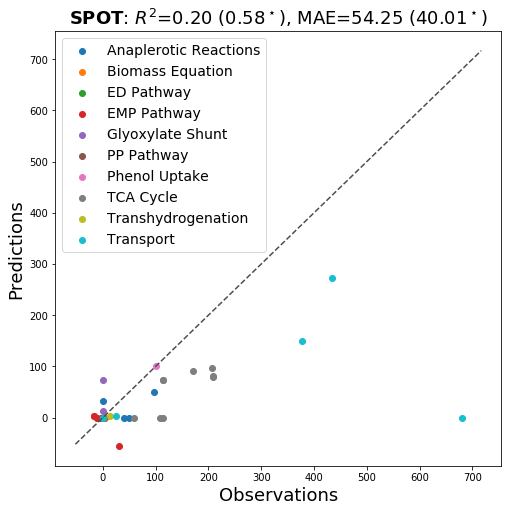

In [18]:
scatterplotcomp_obs_vs_pred(obspred_fluxes, substrate='phenol', method='SPOT', strain='WT', output_dir=output_dir)

##### **Plot 13CMFA vs. SPOT predictions with standard deviations**

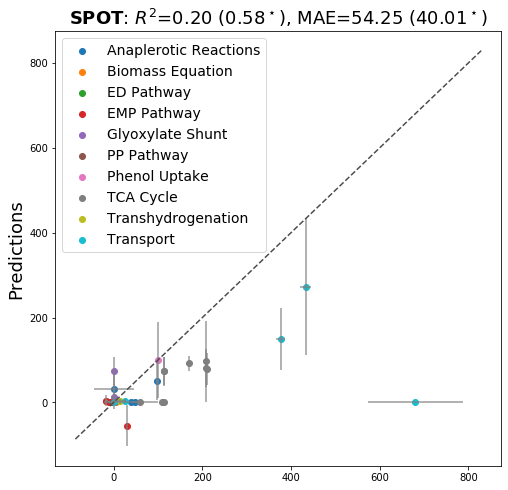

In [19]:
scatterplotcomp_obs_vs_pred_withstd(obspred_fluxes, substrate='phenol', method='SPOT', strain='WT', output_dir=output_dir)

#### **Map phenol SPOT fluxes**

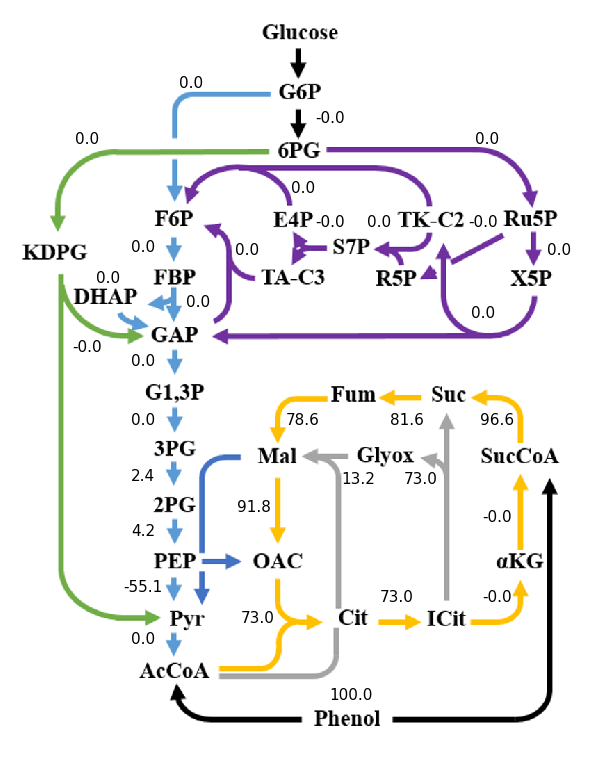

In [20]:
map_flux_results(obspred_fluxes, 'SPOT WT Value', output_dir=output_dir)

### **PVHG**

#### **1. SPOT Predictions for PVHG**

In [21]:
spotsol_PVHG, spotsol_std_PVHG = spot_pred_for_three_reps(model, df_Trans, 'PVHG-P-R1', 'PVHG-P-R2','PVHG-P-R3', 'phenol')

{'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_cl_e': inf,
 'EX_pi_e': inf,
 'EX_nh4_e': inf,
 'EX_fe3_e': inf,
 'EX_k_e': inf,
 'EX_ca2_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_cobalt2_e': inf,
 'EX_zn2_e': inf,
 'EX_cu2_e': inf,
 'EX_o2_e': inf,
 'EX_fe2_e': inf,
 'EX_mobd_e': inf,
 'EX_so4_e': inf,
 'EX_phenol_e': inf}

{'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_cl_e': inf,
 'EX_pi_e': inf,
 'EX_nh4_e': inf,
 'EX_fe3_e': inf,
 'EX_k_e': inf,
 'EX_ca2_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_cobalt2_e': inf,
 'EX_zn2_e': inf,
 'EX_cu2_e': inf,
 'EX_o2_e': inf,
 'EX_fe2_e': inf,
 'EX_mobd_e': inf,
 'EX_so4_e': inf,
 'EX_phenol_e': inf}

{'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_cl_e': inf,
 'EX_pi_e': inf,
 'EX_nh4_e': inf,
 'EX_fe3_e': inf,
 'EX_k_e': inf,
 'EX_ca2_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_cobalt2_e': inf,
 'EX_zn2_e': inf,
 'EX_cu2_e': inf,
 'EX_o2_e': inf,
 'EX_fe2_e': inf,
 'EX_mobd_e': inf,
 'EX_so4_e': inf,
 'EX_phenol_e': inf}

##### **Save solution to data frame**

In [22]:
spotsoldf_PVHG = pd.DataFrame(spotsol_PVHG, columns=['fluxes'])
spotsolstddf_PVHG = pd.DataFrame(spotsol_std_PVHG, columns=['stds'])

##### **Add Phenol PVHG SPOT flux values to phenol fluxes dataframe**

In [24]:
obspred_fluxes = add_pred_fluxes_to_13c_df(obspred_fluxes, spotsoldf_PVHG, spotsolstddf_PVHG, 'phenol', 'SPOT', 'PVHG')

In [25]:
obspred_fluxes.to_csv('../13C_flux_data/obspredfluxes_Phenol_SPOT_CPM.csv', index=True, header= True)

#### **2. Plot solutions: Comparison of SPOT PVHG predictions and 13c measurements**

##### **Plot 13CMFA vs. SPOT predictions**

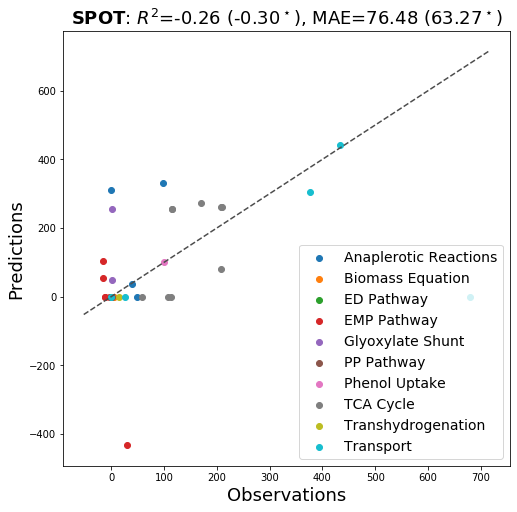

In [26]:
scatterplotcomp_obs_vs_pred(obspred_fluxes, substrate='phenol', method='SPOT', strain='PVHG', output_dir=output_dir)

##### **Plot 13CMFA vs. SPOT predictions with standard deviations**

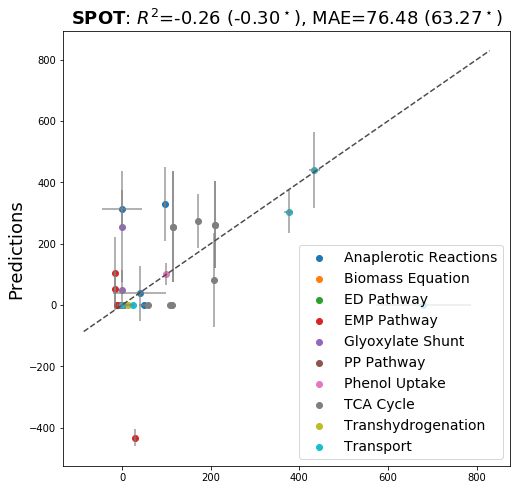

In [27]:
scatterplotcomp_obs_vs_pred_withstd(obspred_fluxes, substrate='phenol', method='SPOT', strain='PVHG', output_dir=output_dir)

##### **Map phenol SPOT fluxes**

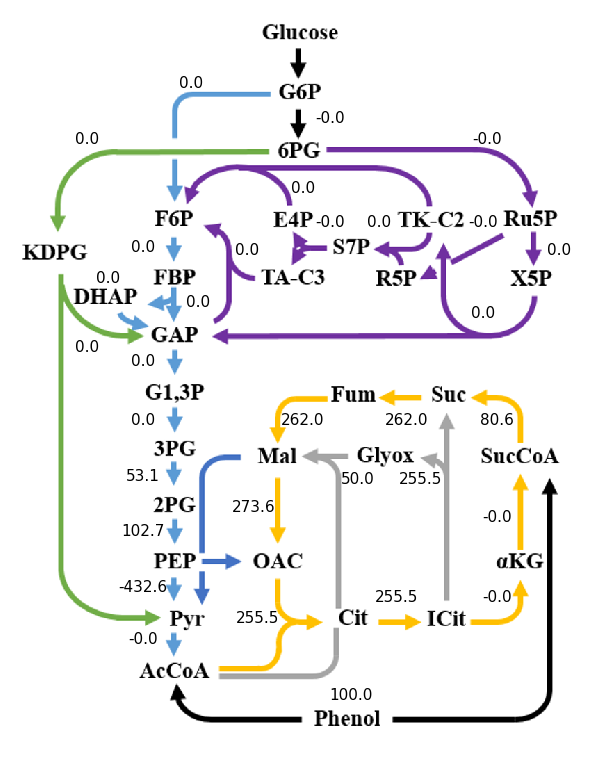

In [28]:
map_flux_results(obspred_fluxes, 'SPOT PVHG Value', output_dir=output_dir)

### **3. Load File with observed growth rates**

##### **Load observed growth rates and plot phenol growth rates**

In [29]:
consumption_and_growth_data = pd.read_csv('../consumption_and_growth_data/consumption_and_growth_data_new.csv', index_col=0)
consumption_and_growth_data

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785
WT-LN-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675


##### **For comparison of predicted and observed growth rates: scale predicted growth rate by multiplying with (observed substrate uptake / predicted substrate uptake)**

In [30]:
scaledgrowthratespot_wtp = scale_growth_to_sub(spotsoldf.loc['Growth_Phenol',:].values[0], spotsoldf.loc['EX_glc__D_e',:].values[0],consumption_and_growth_data.loc['WT-P', 'substrate consumption rate'])
scaledgrowthratespot_pvhgp = scale_growth_to_sub(spotsoldf_PVHG.loc['Growth_Phenol',:].values[0], spotsoldf_PVHG.loc['EX_glc__D_e',:].values[0],consumption_and_growth_data.loc['PVHG-P',  'substrate consumption rate'])


##### **Load Glucose growth rates to compare in same plot** 

In [31]:
allgrowthratesglucose = pd.read_csv('../consumption_and_growth_data/allgrowthratesGlucoseSPOT_CPM.csv', index_col=0)
allgrowthratesglucose

,Growth_Glucose_SPOT
WT-LN-G,-9.452000e-12


##### **Create data frame for all growth rates and save new predictions and previously computed glucose predictions in same data frame** 

In [32]:
allgrowthrates=pd.DataFrame(index=['WT-P', 'PVHG-P', 'WT-LN-G'], columns=['Growth_SPOT'], dtype=float)

In [33]:
allgrowthrates.at['WT-P','Growth_SPOT'] = scaledgrowthratespot_wtp
allgrowthrates.at['PVHG-P','Growth_SPOT'] = scaledgrowthratespot_pvhgp

In [34]:
allgrowthrates.at['WT-LN-G','Growth_SPOT'] = allgrowthratesglucose.loc['WT-LN-G','Growth_Glucose_SPOT']
allgrowthrates

,Growth_SPOT
WT-P,-1.029960e-11
PVHG-P,-9.076779e-12
WT-LN-G,-9.452000e-12


### **4. Compare growth rate predictions with growth rate observations**

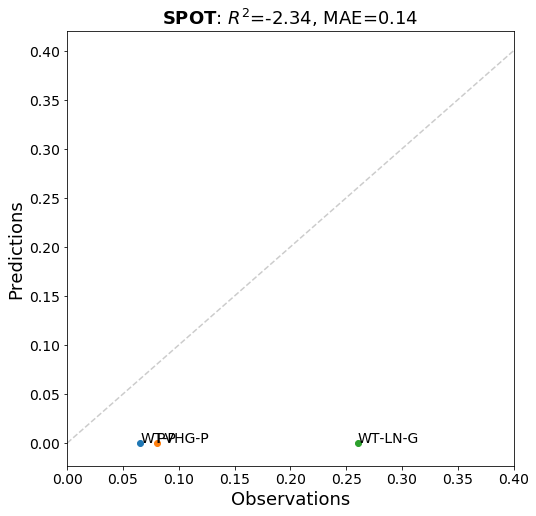

In [35]:
allindices=[str(row) for row in allgrowthrates.index]
scatter_plot_compare(consumption_and_growth_data.loc[allindices, 'growth rate'], allgrowthrates.loc[allindices,'Growth_SPOT'], allindices, 'SPOT', output_dir=output_dir)

##### **Save growth rates as csv file**

In [36]:
allgrowthrates.to_csv('../consumption_and_growth_data/allgrowthratesSPOT_CPM.csv', index=True, header= True)